In [1]:
from GUI_Helper_fcn import *
import os

[NbConvertApp] Converting notebook GUI_Helper_fcn.ipynb to script
[NbConvertApp] Writing 59711 bytes to GUI_Helper_fcn.py


In [2]:
#change this block
sampleDict = {    
 #[1cm pixel length, frame rate per second, sample name]
 #example:
 #"Video/0615M1_no_pressure.TIF":[300.6,10,"0615M1_colon_no_pressure"],
 "220718M2_jejunum_rec4.TIF":[305,25,"220718M2_jejunum_rec4"]
}

In [3]:
#change this block, if you want default - the whole picture, set all parameters below as "None"
c_low = -3  #minimum of colorbar for z score
c_high = 3 #maximum of colobar for z score
d_min = None #minimum of distance, if sepcify, in unit of cm
d_max = None  #maximum of distance, if sepcify, in unit of cm
t_min = None   #minimum of time, if sepcify, in unit of s
t_max = None   #maximum of time, if sepcify, in unit of s

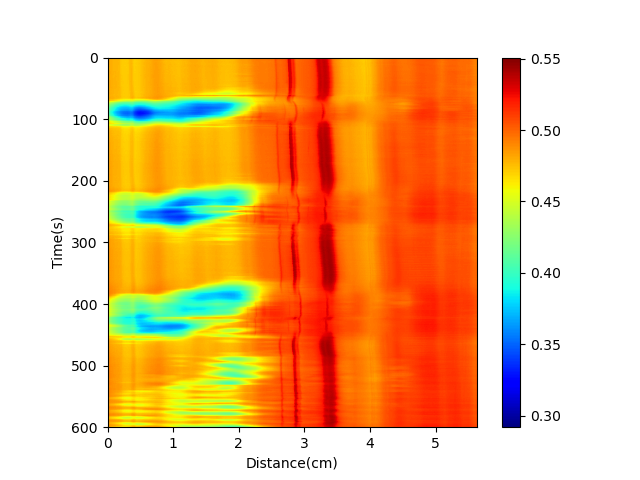

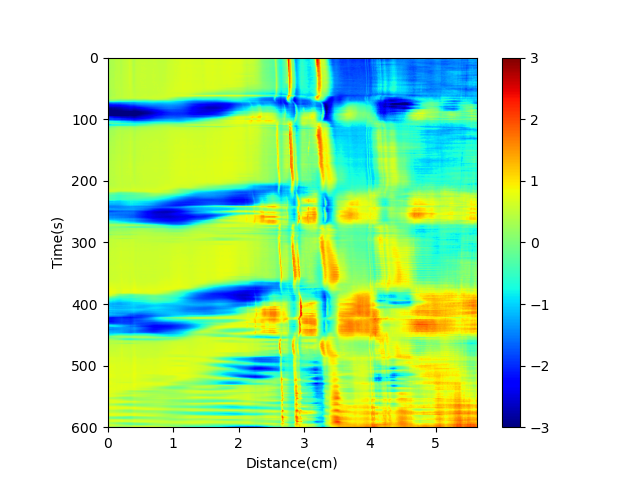

annealing: 1  and  25.0
annealing: 1  and  26.0
annealing: 3  and  13.0
annealing: 4  and  3.0
annealing: 4  and  5.0
annealing: 4  and  12.0
annealing: 16  and  1.0
annealing: 16  and  4.0
annealing: 16  and  20.0
annealing: 16  and  21.0
annealing: 16  and  22.0
annealing: 16  and  23.0


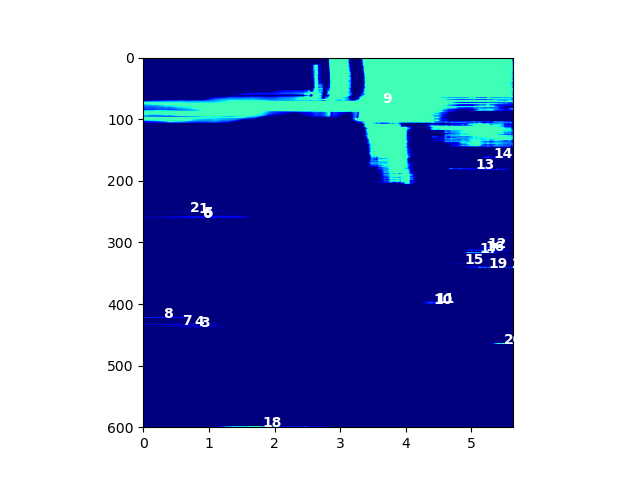

number of regions identified:  21
centroid zero: 15
centroid zero: 18
number of regions left:  19


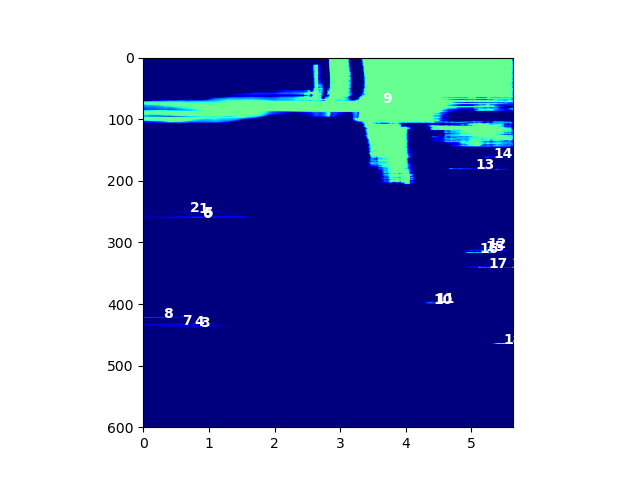

220718M2_jejunum_rec4
Done


In [4]:
for key, param in sampleDict.items():
    im = videoIn(key)
    global fps
    fps = param[1] #set frame rate per second
             #shape(im_s)[0] OR shape(im)[0]: frames, thus divide by fps to get real time
    global scale
    scale = param[0] # set dimensionality pixel/cm
                 #shape(im_s)[1] OR shape(im)[2]: pixels in distance(gut length), thus divide by scale to get real cm
    global sampleIndex
    sampleIndex = param[2]
    
    global aspect
    aspect =  (shape(im)[2]/scale)/(shape(im)[0]/fps)
    setGlobal_GUI(fps,scale, sampleIndex, aspect)
    
    im_s = STmap(im, d_min = d_min, d_max = d_max,t_min = t_min, t_max = t_max)
    im_z = STmap(im,c_low = c_low, c_high = c_high,d_min = d_min, d_max = d_max,t_min = t_min, t_max = t_max, z_score = True)
    
    #mask_c = np.zeros_like(im_s) #if don't want the program to compute a mask, uncomment this line and comment out the next block about mask_c
    
    im_z_r, im_s_r, peak_x, peak_y = find_local_min(im_s, im_z, time_sigma = 1, 
                                                spatial_sigma = 30, time_width = 30,
                                                time_prominence = [0.5,], peak_filter = 80)
    mask_c = generate_combined_mask(im_z_r, peak_x, peak_y)
    mask_c = annealRegions(mask_c, size_low_limit = 100)
    mask_c = clean_mask_c(mask_c)
    mask_c = filter_regions(mask_c)
    mask_c = clean_mask_c(mask_c)
    
    if not os.path.exists(f"{sampleIndex}"):os.makedirs(f'{sampleIndex}')
    with open(os.path.join(f"{sampleIndex}",f"raw_diameter_STmap_{sampleIndex}.npy"),"wb") as f:
        np.save(f,im_s)
    with open(os.path.join(f"{sampleIndex}",f"zscore_STmap_{sampleIndex}.npy"),"wb") as f:
        np.save(f,im_z)
    with open(os.path.join(f"{sampleIndex}",f"mask_c_STmap_{sampleIndex}.npy"),"wb") as f:
        np.save(f,mask_c)

    print(sampleIndex)
    print("Done")